In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
# def fetch(url):
#     import requests, os, haslib, gzip
#     fp=os.path.join('/tmp',haslib.md5(url.encode('utf-8')).hexdigest())
#     if not os.path.isfile(fp):
#         with open(fp,'rb') as f:
#             data=f.read()
#     else :
#         with open(fp,'wb') as f:
#             data = requests.get(url).content
#             f.write(data)
#     return numpy.frombuffer(gzip.decompress(data),dtype=np.uint8)

In [3]:
# import os
# import hashlib
# import gzip
# import requests
# import numpy as np

# def fetch(url, cache_dir='/tmp'):
#     """
#     Fetch and cache URL content as a numpy array.
    
#     Args:
#         url (str): URL to fetch data from
#         cache_dir (str, optional): Directory to store cached files. Defaults to '/tmp'.
    
#     Returns:
#         numpy.ndarray: Decompressed data as a uint8 numpy array
#     """
#     # Create cache directory if it doesn't exist
#     os.makedirs(cache_dir, exist_ok=True)
    
#     # Generate unique filename based on URL hash
#     filename = hashlib.md5(url.encode('utf-8')).hexdigest()
#     filepath = os.path.join(cache_dir, filename)
    
#     # Check if file exists in cache
#     if os.path.isfile(filepath):
#         # Read from cache
#         with open(filepath, 'rb') as f:
#             data = f.read()
#     else:
#         # Fetch from URL and cache
#         response = requests.get(url)
#         response.raise_for_status()  # Raise an exception for bad responses
#         data = response.content
        
#         # Save to cache
#         with open(filepath, 'wb') as f:
#             f.write(data)
    
#     # Decompress and convert to numpy array
#     try:
#         decompressed_data = gzip.decompress(data)
#         return np.frombuffer(decompressed_data, dtype=np.uint8)
#     except gzip.BadGzipFile:
#         # Handle non-gzipped data
#         return np.frombuffer(data, dtype=np.uint8)

# # Example usage
# # data = fetch('https://example.com/compressed_data.gz')

In [4]:
# X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
# Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
# X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
# Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [5]:
import pandas as pd

In [6]:
df1=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [7]:
df1.shape

(42000, 785)

In [8]:
df1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x=df1.iloc[:,1:]

In [10]:
x.shape

(42000, 784)

In [11]:
y=df1.iloc[:,0]

In [12]:
y.shape

(42000,)

In [13]:
from sklearn.model_selection import train_test_split as tts

In [14]:
X_train, X_test, y_train, y_test = tuple(np.array(x,dtype=np.uint8) for x in tts(
        x, y,test_size=0.2,shuffle=True))

In [15]:
X_train.dtype

dtype('uint8')

In [16]:
type(X_train)

numpy.ndarray

In [17]:
X_train.shape

(33600, 784)

(<matplotlib.image.AxesImage at 0x7b3435aeaf50>, 2)

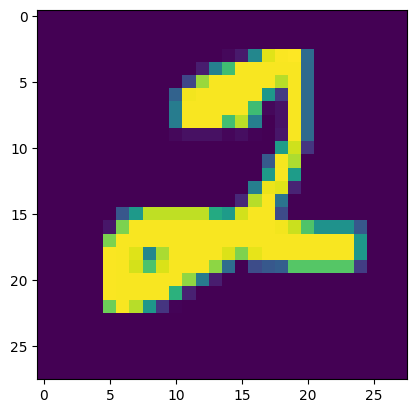

In [18]:
imshow(X_train[0].reshape(28,28)),y_train[0]

In [19]:
import torch
import torch.nn as nn

In [20]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1=nn.Linear(784,128)
        self.act=nn.ReLU()
        self.l2=nn.Linear(128,10)
    def forward(self,x):
        x=self.l1(x)
        x=self.act(x)
        x=self.l2(x)
        return x

In [21]:
model=net()

In [22]:
model(torch.tensor(X_train[0:10],dtype=torch.float32))

tensor([[ -1.1067,  15.7639,   6.4268, -16.3137, -38.2941,   7.5235,  12.1253,
         -34.3103, -19.4057,  34.3797],
        [-29.5464,  25.6902,   0.2252, -13.3157, -27.1781, -15.3776,  27.9099,
         -16.6387,  14.4017,  -8.2089],
        [-18.3748,  -0.4096,  -8.2827, -19.5566, -11.2188,  20.8821,   3.3857,
         -28.4377,   3.6763,  56.0520],
        [-18.4833,  23.2615, -18.4676, -32.2924, -58.3365,   0.2626,   5.2090,
         -67.9803, -30.0688,  23.1493],
        [-21.4499,   1.2029,  -4.1118, -11.2031, -28.8142,   5.4177,  12.7913,
         -29.9016,  -7.2287,  39.9274],
        [-23.1640,   3.7553, -17.5620, -33.9914, -22.9650,  23.9176,  11.9985,
         -39.9818,  -8.1817,  78.3321],
        [ -8.4289,   8.3953,  -3.6805,  12.5596, -11.9491,  17.3821,  21.4899,
           2.3409,  11.0103,  25.7474],
        [-38.2388, -27.8879, -23.0542, -44.2249, -23.4837,  28.0052,   4.1384,
         -49.4327, -20.1188,  79.5767],
        [ 14.4712,   1.1482,   1.4926, -33.2992,

In [23]:
model(torch.tensor(X_train[0:10]).float())

tensor([[ -1.1067,  15.7639,   6.4268, -16.3137, -38.2941,   7.5235,  12.1253,
         -34.3103, -19.4057,  34.3797],
        [-29.5464,  25.6902,   0.2252, -13.3157, -27.1781, -15.3776,  27.9099,
         -16.6387,  14.4017,  -8.2089],
        [-18.3748,  -0.4096,  -8.2827, -19.5566, -11.2188,  20.8821,   3.3857,
         -28.4377,   3.6763,  56.0520],
        [-18.4833,  23.2615, -18.4676, -32.2924, -58.3365,   0.2626,   5.2090,
         -67.9803, -30.0688,  23.1493],
        [-21.4499,   1.2029,  -4.1118, -11.2031, -28.8142,   5.4177,  12.7913,
         -29.9016,  -7.2287,  39.9274],
        [-23.1640,   3.7553, -17.5620, -33.9914, -22.9650,  23.9176,  11.9985,
         -39.9818,  -8.1817,  78.3321],
        [ -8.4289,   8.3953,  -3.6805,  12.5596, -11.9491,  17.3821,  21.4899,
           2.3409,  11.0103,  25.7474],
        [-38.2388, -27.8879, -23.0542, -44.2249, -23.4837,  28.0052,   4.1384,
         -49.4327, -20.1188,  79.5767],
        [ 14.4712,   1.1482,   1.4926, -33.2992,

In [24]:
bs=32
loss_func=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters())
for i in range(100):
    samp=np.random.randint(0,X_train.shape[0],size=(bs))
    out=model(torch.tensor(X_train[samp]).float())
    y=torch.tensor(y_train[samp]).long()
    loss=loss_func(out,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    print(loss)

tensor(43.9538, grad_fn=<NllLossBackward0>)
tensor(20.3522, grad_fn=<NllLossBackward0>)
tensor(19.0001, grad_fn=<NllLossBackward0>)
tensor(11.8630, grad_fn=<NllLossBackward0>)
tensor(9.5910, grad_fn=<NllLossBackward0>)
tensor(6.6596, grad_fn=<NllLossBackward0>)
tensor(11.2014, grad_fn=<NllLossBackward0>)
tensor(5.9704, grad_fn=<NllLossBackward0>)
tensor(12.2632, grad_fn=<NllLossBackward0>)
tensor(10.3098, grad_fn=<NllLossBackward0>)
tensor(8.7607, grad_fn=<NllLossBackward0>)
tensor(5.2360, grad_fn=<NllLossBackward0>)
tensor(7.1335, grad_fn=<NllLossBackward0>)
tensor(4.1335, grad_fn=<NllLossBackward0>)
tensor(4.9765, grad_fn=<NllLossBackward0>)
tensor(3.8167, grad_fn=<NllLossBackward0>)
tensor(3.0814, grad_fn=<NllLossBackward0>)
tensor(4.0750, grad_fn=<NllLossBackward0>)
tensor(3.2284, grad_fn=<NllLossBackward0>)
tensor(4.5481, grad_fn=<NllLossBackward0>)
tensor(2.9421, grad_fn=<NllLossBackward0>)
tensor(7.4339, grad_fn=<NllLossBackward0>)
tensor(3.9826, grad_fn=<NllLossBackward0>)
tens

In [25]:
from tqdm import trange

In [26]:
bs=32
loss_func=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters())
for i in (t:= trange(100)):
    samp=np.random.randint(0,X_train.shape[0],size=(bs))
    out=model(torch.tensor(X_train[samp]).float())
    y=torch.tensor(y_train[samp]).long()
    loss=loss_func(out,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    t.set_description('loss %.2f' % loss.item())

loss 0.44: 100%|██████████| 100/100 [00:00<00:00, 264.28it/s]


In [27]:
bs=32
loss_func=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters())
for i in (t:= trange(10)):
    samp=np.random.randint(0,X_train.shape[0],size=(bs))
    out=model(torch.tensor(X_train[samp]).float())
    y=torch.tensor(y_train[samp]).long()
    loss=loss_func(out,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    loss=loss.item()
    pos=torch.argmax(out,dim=1)
    acc=(pos==y).float().mean()
    acc=acc.item()
    t.set_description('loss %.2f acc %.2f' % (loss,acc))

loss 0.88 acc 0.81: 100%|██████████| 10/10 [00:00<00:00, 209.28it/s]


In [28]:
bs=32
loss_func=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters())
losses=[]
accuracies=[]
for i in (t:= trange(1000)):
    samp=np.random.randint(0,X_train.shape[0],size=(bs))
    out=model(torch.tensor(X_train[samp]).float())
    y=torch.tensor(y_train[samp]).long()
    loss=loss_func(out,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    loss=loss.item()
    pos=torch.argmax(out,dim=1)
    acc=(pos==y).float().mean()
    acc=acc.item()
    losses.append(loss)
    accuracies.append(acc)
    t.set_description('loss %.2f acc %.2f' % (loss,acc))

loss 0.11 acc 0.97: 100%|██████████| 1000/1000 [00:03<00:00, 255.63it/s]


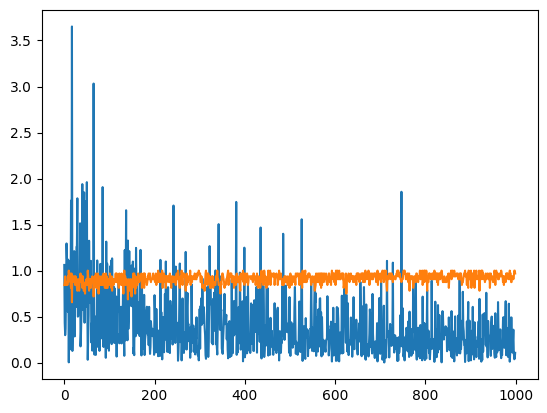

In [29]:
plot(losses)
plot(accuracies)

In [30]:
y_test_pred=torch.argmax(model(torch.tensor(X_test).float()),dim=1)
(y_test_pred==y_test).float().mean()

tensor(0.9251)

In [31]:
model.l1.weight.shape

torch.Size([128, 784])

In [32]:
l1=model.l1.weight.detach().numpy().T
l2=model.l2.weight.detach().numpy().T

In [33]:
def forward(x):
    x=x.dot(l1)
    x=np.maximum(x,0)
    x=x.dot(l2)
    return x

y_test_preds_out=forward(X_test)
y_test_preds=np.argmax(y_test_preds_out,axis=1)
(y_test_preds==y_test).mean()

0.925

In [34]:
np.log(np.exp(y_test_preds_out[0]).sum())

10.860358

In [35]:
y_test[0]

9

In [36]:
y_test_preds_out[0,y_test[0]]

10.842896

In [37]:
y_test_preds_out[0][y_test[0]]

10.842896

In [38]:
samp=2
-y_test_preds_out[samp,y_test[samp]]+np.log(np.exp(y_test_preds_out[samp]).sum())

0.23411751

In [39]:
ret = -y_test_preds_out[range(y_test_preds_out.shape[0]),y_test] + np.log(np.exp(y_test_preds_out).sum(axis=1))

In [40]:
ret.shape

(8400,)

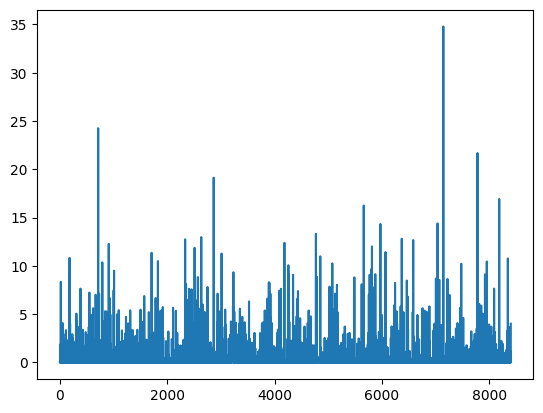

In [41]:
plot(ret)

In [42]:
np.argmax(ret)

2536

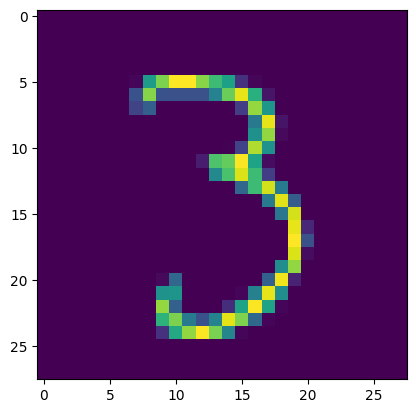

In [43]:
imshow(X_test[3048].reshape(28,28))

In [44]:
a=sorted(list(zip(ret,range(ret.shape[0]))),reverse=True)[:10]

In [45]:
a

[(inf, 2536),
 (34.78526, 7142),
 (24.250908, 713),
 (21.679775, 7778),
 (19.129143, 2865),
 (16.9248, 8183),
 (16.243786, 5660),
 (14.397976, 7035),
 (14.33679, 5970),
 (13.316248, 4769)]

In [46]:
a=[x[1] for x in a]

In [47]:
a

[2536, 7142, 713, 7778, 2865, 8183, 5660, 7035, 5970, 4769]

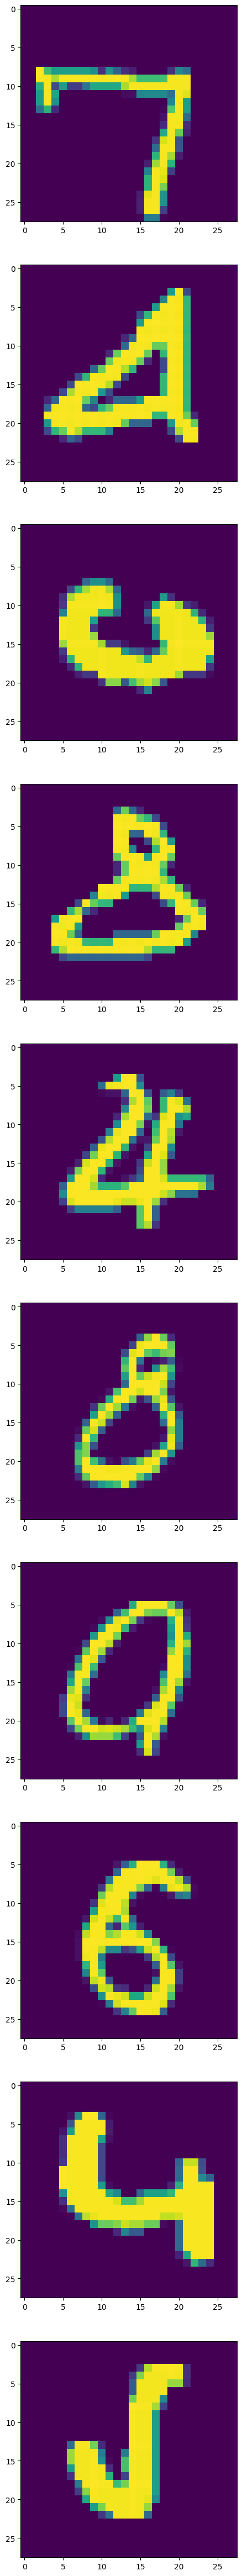

In [48]:
fig, axs = plt.subplots(len(a), 1, figsize=(len(a), 60))

for i in range(len(a)):
    axs[i].imshow(X_test[a[i]].reshape(28,28))

plt.show()

## good example of reshaping operation

In [49]:
grid=sorted(list(zip(ret,range(ret.shape[0]))),reverse=True)[0:16]

In [50]:
xbad=X_test[[x[1] for x in grid]]

In [51]:
xbad.reshape(4,28*4,28)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [52]:
np.concatenate(xbad.reshape(4,28*4,28),axis=1).shape

(112, 112)

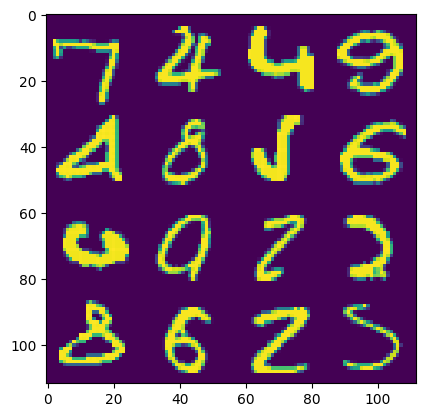

In [53]:
imshow(np.concatenate(xbad.reshape(4,28*4,28),axis=1))

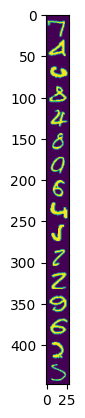

In [54]:
imshow(np.concatenate(xbad.reshape(4,28*4,28),axis=0))

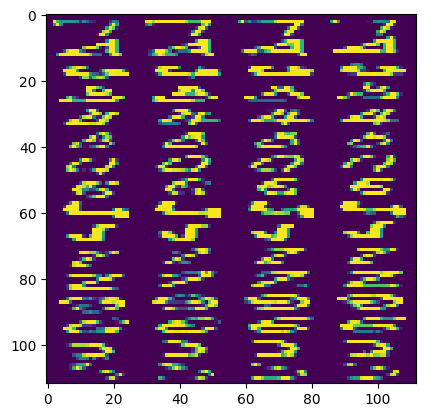

In [55]:
imshow(xbad.reshape(112,112))

In [56]:
28*4

112

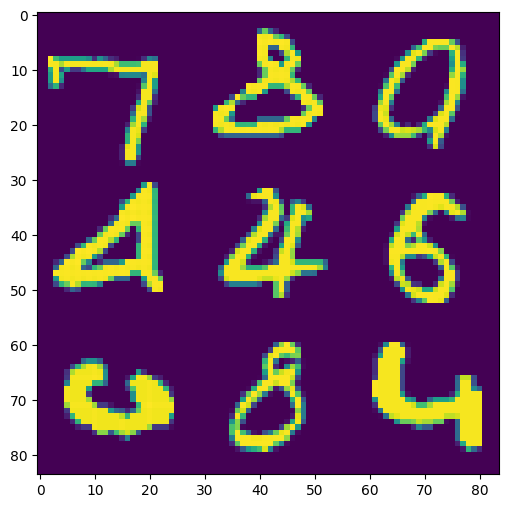

In [57]:
g=3
grid=sorted(list(zip(ret,range(ret.shape[0]))),reverse=True)[0:g*g]
xbad=X_test[[x[1] for x in grid]]
figsize(6,6)
imshow(np.concatenate(xbad.reshape(g,28*g,28),axis=1))

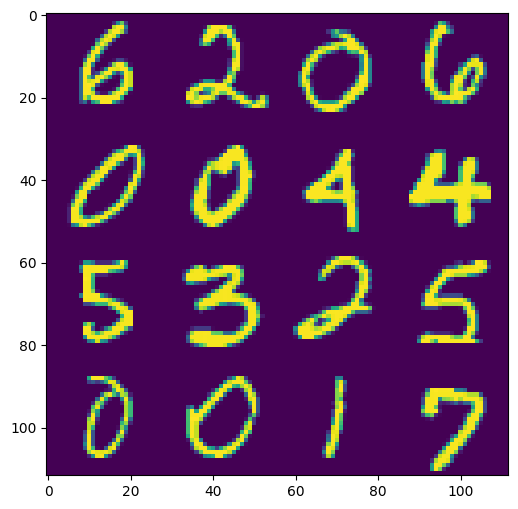

In [58]:
g=4
grid=sorted(list(zip(ret,range(ret.shape[0]))))[0:g*g]
xbad=X_test[[x[1] for x in grid]]
figsize(6,6)
imshow(np.concatenate(xbad.reshape(g,28*g,28),axis=1))

In [59]:
rand_shape=np.random.randint(0,10,size=(4,4))

In [60]:
rand_shape.flatten()

array([5, 8, 2, 2, 9, 8, 9, 5, 5, 2, 8, 1, 5, 1, 3, 7])

In [61]:
rand_shape

array([[5, 8, 2, 2],
       [9, 8, 9, 5],
       [5, 2, 8, 1],
       [5, 1, 3, 7]])

In [62]:
rand_shape.reshape(2,2*2,2)

array([[[5, 8],
        [2, 2],
        [9, 8],
        [9, 5]],

       [[5, 2],
        [8, 1],
        [5, 1],
        [3, 7]]])

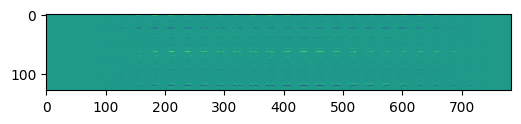

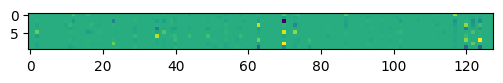

In [74]:
# compute gradients in torch
model.zero_grad()
out = model(torch.tensor(X_test.reshape((-1, 28*28))).float())
out.retain_grad()
loss = loss_func(out, torch.tensor(y_test).long()).mean()
loss.retain_grad()
loss.backward()
imshow(model.l1.weight.grad)
figure()
imshow(model.l2.weight.grad)

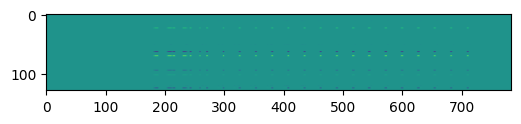

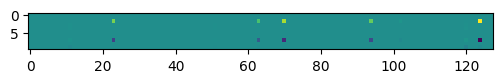

In [73]:
# compute gradients in torch
samp = [0,1,2,3]
model.zero_grad()
out = model(torch.tensor(X_test[samp].reshape((-1, 28*28))).float())
out.retain_grad()
loss = loss_func(out, torch.tensor(y_test[samp]).long()).mean()
loss.retain_grad()
loss.backward()
imshow(model.l1.weight.grad)
figure()
imshow(model.l2.weight.grad)

In [75]:
loss.grad,out.grad

(tensor(1.),
 tensor([[ 3.3485e-16,  7.2504e-12,  3.3117e-08,  ...,  1.0091e-06,
           6.6085e-08, -1.8288e-06],
         [ 2.2537e-10,  1.6012e-11,  2.9572e-12,  ...,  5.4803e-18,
           5.0351e-11,  2.9761e-12],
         [ 9.3797e-14,  1.2723e-08,  2.5702e-05,  ..., -2.5800e-05,
           5.0380e-08,  7.3161e-11],
         ...,
         [ 1.6314e-09,  2.1129e-08,  4.3845e-09,  ...,  4.4655e-12,
           6.0291e-12,  4.0427e-07],
         [ 6.8109e-20,  9.9606e-22,  1.1456e-12,  ...,  1.1972e-16,
           3.2124e-11,  5.6273e-14],
         [ 3.8387e-17,  1.5873e-07, -1.1680e-04,  ...,  1.1654e-04,
           2.7313e-08,  1.8937e-10]]))

In [63]:
forward(X_test).shape

(8400, 10)

In [64]:
np.max(np.array(([3,5,6,7],[1,8,6,7])))

8

In [65]:
a

[2536, 7142, 713, 7778, 2865, 8183, 5660, 7035, 5970, 4769]

In [66]:
torch.tensor(([1,8,3,7,6],[1,8,9,7,6])).shape

torch.Size([2, 5])

In [67]:
torch.argmax(torch.tensor(([1,8,3,7,6],[1,8,9,7,6])),dim=0)

tensor([0, 0, 1, 0, 0])

In [68]:
np.random.randint(0,100,size=(2))

array([13, 76])

In [69]:
model.parameters()

<generator object Module.parameters at 0x7b3428253a00>

In [70]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'City': ['New York', 'San Francisco', 'Chicago', 'Boston'],
    'Salary': [50000, 60000, 75000, 90000]
}
df = pd.DataFrame(data)

# 1. Select a single column (returns a Series)
single_column = df['Name']
print("1. Single Column Selection:")
print(single_column)
print("\n")

# 2. Select multiple columns (returns a DataFrame)
multiple_columns = df[['Name', 'City']]
print("2. Multiple Column Selection:")
print(multiple_columns)
print("\n")

# 3. Using .loc[] to select columns by label
loc_columns = df.loc[:, ['Name', 'Salary']]
print("3. Using .loc[] to select columns:")
print(loc_columns)
print("\n")

# 4. Using .iloc[] to select columns by integer index
iloc_columns = df.iloc[:, [0, 2]]  # First and third columns
print("4. Using .iloc[] to select columns:")
print(iloc_columns)
print("\n")

# 5. Select columns by data type
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
print("5. Columns by Data Type (Numeric):")
print(numeric_columns)
print("\n")

# 6. Select columns that contain specific strings
columns_with_a = df.filter(regex='A')
print("6. Columns Containing 'A':")
print(columns_with_a)

1. Single Column Selection:
0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object


2. Multiple Column Selection:
      Name           City
0    Alice       New York
1      Bob  San Francisco
2  Charlie        Chicago
3    David         Boston


3. Using .loc[] to select columns:
      Name  Salary
0    Alice   50000
1      Bob   60000
2  Charlie   75000
3    David   90000


4. Using .iloc[] to select columns:
      Name           City
0    Alice       New York
1      Bob  San Francisco
2  Charlie        Chicago
3    David         Boston


5. Columns by Data Type (Numeric):
   Age  Salary
0   25   50000
1   30   60000
2   35   75000
3   40   90000


6. Columns Containing 'A':
   Age
0   25
1   30
2   35
3   40
